Hola **Carlos**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¡Llena ese carrito! | Sprint 4 | Carlos Vallejo Leal

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

* Abrir primero mis csv's y usar head para ver como estan los datos.
* Al abrir mis archivos csv note que todos tienen como separador un punto y coma ';', entonces pase el argumento sep=';' a mi .read_csv para poder leerlos correctamente. A su vez asigne estos dataframes a un DF con el nombre correspondiente al csv origen.

In [2]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8')

In [3]:
# leer conjuntos de datos en los DataFrames
aisles = pd.read_csv('datasets/aisles.csv', sep=';')
departments = pd.read_csv('datasets/departments.csv', sep=';')
instacart_orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
order_products = pd.read_csv('datasets/order_products.csv', sep=';')
products = pd.read_csv('datasets/products.csv', sep=';')

In [4]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
# mostrar información del DataFrame
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [8]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Ya tengo mis DataFrames dentro de mi notebook, funciono usar sep=; para importarlos correctamente. Abriendolos puedo notar que el tipo de datos se ve correcto por lo pronto. Adicionalmente puedo ver que tengo datos usentes en "products", "instacart_orders" y "order_products".

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo importando las librerías y cargando tus datos en celdas diferentes, esto siempre ayuda que la legibilidad del código sea mejor
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

* Las columnas de ID en todos los dataframe son números enteros. De resto estan correctas, como INT los numeros y OBJ los strings. Solo hay uno dentro del DF "instacart_orders", la columna days_since_prior_order podria pasar a ser mejor enteros. Fuera de que podriamos asignar a algunos como categorias. Creo que los datos se pueden usar tal cual ya estan.
* Procederia a checar si tenemos valores duplicados y valores ausentes.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
instacart_orders.duplicated().sum()

15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

#instacart_orders[(instacart_orders['order_dow']==3) & (instacart_orders['order_hour_of_day']==2)]
instacart_orders.query('order_dow ==3 and order_hour_of_day ==2').duplicated().sum()

15

¿Qué sugiere este resultado?

Al usar el filtro mediante un query y luego buscar los valores duplicados podemos ver que todos los duplicados se encuentran en este rango.

In [11]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates()

In [12]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders.duplicated().sum()

0

In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos
instacart_orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

En este caso los datos duplicados se deben descartar debido a que se duplican en 'order_id', y esta variable debe ser unica por cada fila. Una vez identificados nos podemos deshacer de esos duplicados usando `.drop_duplicates()`.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas

products.duplicated().sum()

0

In [15]:
# Verifica si hay IDs duplicadas de productos
products['product_id'].duplicated().sum()

0

In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

products['product_name'].str.upper().duplicated().sum()

1361

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes

# Hago el cambio a mayusculas en mi DataFrame para seguir analizando
products['product_name'] = products['product_name'].str.upper()

#products['product_name'].str.upper().dropna().duplicated().sum()
products.query('product_name.notnull()')['product_name'].str.upper().value_counts().sort_values(ascending=False).head(104)

GREEN TEA WITH GINSENG AND HONEY      3
MOUNTAIN BERRY BLAST SPORTS DRINK     2
SOUR CREAM AND ONION POTATO CHIPS     2
HIGH PERFORMANCE ENERGY DRINK         2
BALSAMIC VINEGAR OF MODENA            2
                                     ..
CREAM OF MUSHROOM SOUP                2
AGED BALSAMIC VINEGAR OF MODENA       2
BURRITO- STEAK & CHEESE               2
VITAMIN D3 5000 IU                    2
HONEY-HERB DROPS COUGH SUPPRESSANT    1
Name: product_name, Length: 104, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Guardar la transformación de la columna sobre la misma ayuda para que el resto de los análisis queden con la transformación
</div>

In [18]:
products.info()
products.query('product_name == "BLANC DE NOIRS"')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
11163,11164,BLANC DE NOIRS,62,5
44078,44079,BLANC DE NOIRS,134,5


Describe brevemente tus hallazgos y lo que hiciste con ellos.



* ID's cambian pero los nombres si se estan repitiendo.
* Imagino que esto se puede deber a que  los productos son diferentes (por su id distinto) pero el nombre no fue registrado completamente, esto podria ser desde la marca, procedencia, tamaño, presentación y/o edición. 
* Yo considero que la mejor forma de limpiar estos datos sería nadamas dejando en mayusculas o minisculas el nombre del producto. De resto por ser id's de producto diferente los tratare como productos diferentes, a su vez no tengo duplicados completos. Ergo este dataset ya esta listo para usarse.

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [20]:
# Revisa si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
* No tengo ninguna fila con duplicados en el DataFrame `departments`.

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [22]:
# Revisa si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
* No hay ningun tipo de duplicado, ya sea fila completa o id de pasillo.

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(order_products['order_id'].duplicated().sum())
print(order_products['product_id'].duplicated().sum())
order_products.head()


4094961
4499434


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

* Era de esperarse tener valores duplicados en order_id y en product_id ya que puede haber varios productos en una orden, y puede haber varios productos en distintas ordenes.
* No tiene sentido buscar duplicados en mis otras dos columnas por que en add_to_cart_order siempre habra duplicados ya que es un numero secuencial y reordered es binario.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión de estos últimos datasets!
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
print("Valores ausentes:\n",products.isna().sum())

Valores ausentes:
 product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.
* Podemos ver que tenemos 1258 valores ausentes en product_name, pero a su vez tengo el ID de todos esos productos, supongo que en algun punto se dejo de llenar esa columna, pero eventualmente si tenemos una base de datos con IDs puedo usarla para rellenar el nombre de mis productos. Mientras tanto puedo sustituir los valores con 'unknown'.

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

products.query('aisle_id == 100').isnull().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Describe brevemente cuáles son tus hallazgos.

* Todos los productos ausentes se encuentran en el pasillo con ID 100.

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

products.query('department_id == 21').isnull().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Describe brevemente cuáles son tus hallazgos.

* Todos los productos que faltan de nombre son del pasillo ID 100 y del departamento ID 21.

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles.query('aisle_id == 100'))
print()
print(departments.query('department_id == 21'))

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

* Por lo visto los datos del pasillo 100 y del departamento 21 tambien faltan y no los tenemos, podria ser que se borraron o bien que aun no se han registrado y por lo mismo nos falta esa información de nuestros productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, revisaste sobre los datasets correctos para comparar los datos
</div>

In [29]:
# Completa los nombres de productos ausentes con 'Unknown' -> 'UNKNOWN'
products['product_name'] = products['product_name'].fillna('UNKNOWN')

products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Como comente al comienzo, se reemplazara el nombre de los productos por 'UNKNOWN'. Despues de reemplazarlo corri mi isna() para ver si ya no tenia mas valores ausentes y por lo visto ya no.

### `orders` data frame

In [30]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())

# Busque mi valor minimo, en este caso 1.
#instacart_orders['order_number'].sort_values().unique()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Filtro para ver unicamente los clientes que es su primera orden.
instacart_orders.query('order_number == 1')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [32]:
#Sustituir los NaN en 'days_since_prior_order' por 0

instacart_orders['days_since_prior_order'] = instacart_orders['days_since_prior_order'].fillna(0)
instacart_orders.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

* Todos los datos ausentes en mi columna days_since_prior_order eran el primer pedido del cliente, cheque mis valores minimo y maximo y eran 1 y 30. Por esa razón decido cambiar el valor ausente por un 0. Puesto que han pasado 0 dias desde el pedido anterior. Mi otra opción hubiera sido descartar los datos, pero creo que eso podria agregar ruido.

### `order_products` data frame

In [33]:
# Encuentra los valores ausentes
order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [34]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor Máximo:',order_products['add_to_cart_order'].max())
print('Valor Mínimo:',order_products['add_to_cart_order'].min())

Valor Máximo: 64.0
Valor Mínimo: 1.0


Describe brevemente cuáles son tus hallazgos.

* Tengo 836 valores ausentes de 4545007 valores.
* 'add_to_cart_order' son valores SECUENCIALES. Es decir siguen un orden, estos pueden ser entre 1 hasta 64.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo buscando los valores máximos y mínimos!
</div>

In [35]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_order = order_products[order_products['add_to_cart_order'].isna()]

print(missing_cart_order['order_id'].sort_values().unique())

[   9310   61355  102236  129627  165801  171934  180546  264710  293169
  388234  404157  678116  733526  747668  813364  844733  854647  871281
  888470  903110  936852 1021563 1038146 1169835 1183255 1220886 1302315
 1308785 1386261 1477139 1529171 1564093 1598369 1625713 1633337 1648217
 1673227 1677118 1713430 1717990 1730767 1800005 1832957 1888628 1916118
 1959075 1961723 1968313 2094761 2136777 2170451 2256933 2409109 2449164
 2470674 2479011 2621907 2625444 2652650 2721963 2729254 2849370 2926893
 2979697 2997021 2999801 3125735 3308010 3347453 3383594]


In [36]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Extraer ID's de pedidos
missing_ids = missing_cart_order['order_id'].unique()

filtered_view_id = order_products[order_products['order_id'].isin(missing_ids)]

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
group_missing_cart_order = filtered_view_id.groupby('order_id')['product_id'].count().sort_values()

print('Agrupados por ID de orden y contando productos en cada orden:\n',group_missing_cart_order)

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print('\nValor Minimo del Conteo:',group_missing_cart_order.min())
print('Valor Maximo del Conteo:',group_missing_cart_order.max())

Agrupados por ID de orden y contando productos en cada orden:
 order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Valor Minimo del Conteo: 65
Valor Maximo del Conteo: 127


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para revisar si los pedidos con valores ausentes tienen o no más de 64 pedidos primero deberías buscar los valores NaN sobre la columna add_to_cart_order y luego deberías usar las order_id que que tienes en la variable `missing_cart_order` suponiendo que sea donde guardas el resultado anterior (Solo toma los valores de la columna order_id) y filtrar en el dataset original utilizando `isin()` y luego si agrupar por order_id y contar en product_id, ya que de la forma en que lo estás haciendo solo cuenta cuantos valores ausentes hay por órden pero puede que tengas órdenes que tiene valores ausentes y también valores que no lo son y lo que interesa es contar todos estos datos.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Tienes toda la razón, ya hice el cambio correspondiente, extraje mis valores en una nueva variable y luego busque esa variable con isin para aplciar mi filtro y extraer unicamente las ordenes con valores ausentes.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto Carlos, cómo puedes observar el resultado cambió! Siempre hay que poner especial atención a cómo aplicamos los filtros ya que estas alteran mucho los resultados de nuestros cálculos
</div>

Describe brevemente cuáles son tus hallazgos.

* Se que de mis 70 valores ausentes, todos estan entre 1-63 productos por orden. Como comentaba anteriormente, estos son SECUENCIALES y quiza aportan menos del 0.018% de los datos de mi DataFrame (~4.5m). Yo los descartaría.

In [37]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')

order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

* Nuestros datos ausentes se llenaron con 999, yo los hubiera descartado. Supongo 999 es un estandar para este tipo de situaciones, no me queda del todo claro por que lo usariamos.
* Despues de esto convertimos a tipo INT mi columna 'add_to_cart_order' mediante .astype(). Esto por que al ser valores secuenciales no ocupamos decimales.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


* Ya tenemos nuestros conjuntos de datos limpios y listos para empezar a hacer analisis con ellos. Utilice metodos como fillna y isnull() para tratar con los datos ausentes ais como filtros y duplicated() para tratar con datos duplicados.
* Ya conocemos tambien que tipo de información provee cada uno de nuestros datos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [38]:
# Uso unique para verificar los valores
instacart_orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [39]:
# Uso unique para verificar los valores
instacart_orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

Escribe aquí tus conclusiones
* Los valores de 'order_hour_of_day' se encuentras entre 0-23, representando el horario en formato de 24 hrs.
*  Los valores de 'order_dow' se encuentran entre 0 y 6, representando los dias de la semana, empezando con 0 -> Domingo

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Siempre hay que revisar que los datos que se tienen tengan los valores adecuados 
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

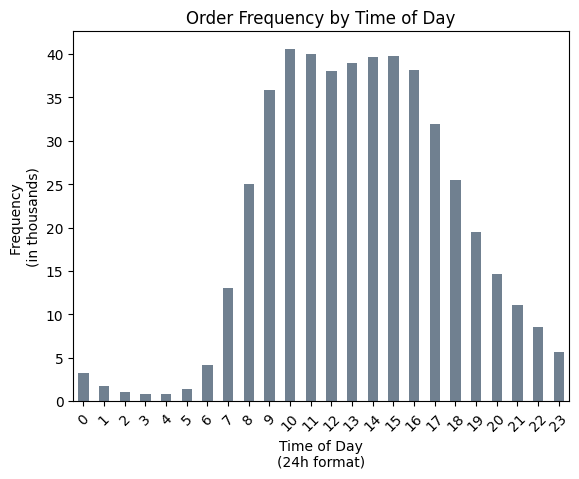

In [40]:
people_hour_of_day = instacart_orders.groupby('order_hour_of_day')['user_id'].count()

(people_hour_of_day/1000).plot(kind = 'bar',
                        title = 'Order Frequency by Time of Day',
                        xlabel='Time of Day\n(24h format)',
                        ylabel= 'Frequency \n(in thousands)',
                        rot = 45,
                        color='slategray'
                        )
plt.show()

Escribe aquí tus conclusiones
* Con este gráfico podemos ver que hay muy pocas compras en las madrugadas (como lo esperaba). 
* A partir de las 6:00 empieza a subir la frecuencia de las compras, teniendo su pico a las 10:00 y manteniendose alto hasta las 16:00. Despues de esta hora empieza a bajar la frecuencia de compras.
* Como conclusion tenemos que el punto mas alto de compras realziadas es entre 10:00 y 16:00. Con su pico a las 10:00.

### [A3] ¿Qué día de la semana compran víveres las personas?

<function matplotlib.pyplot.show(close=None, block=None)>

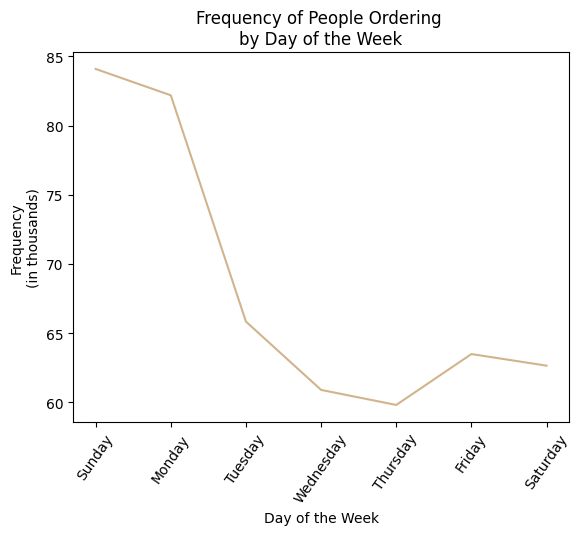

In [41]:
# Diccionario days of week
days_of_week_dict = {0 : 'Sunday',
                     1 : 'Monday',
                     2 : 'Tuesday',
                     3 : 'Wednesday',
                     4 : 'Thursday',
                     5 : 'Friday',
                     6 : 'Saturday'
                     }

# Replace my Dictionary values in my DataFrame
instacart_orders['order_dow'] = instacart_orders['order_dow'].replace(days_of_week_dict)

plot_dow = instacart_orders['order_dow'].value_counts()
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plot_dow = plot_dow.reindex(ordered_days)

(plot_dow/1000).plot(kind='line',
                  title='Frequency of People Ordering \nby Day of the Week',
                  x='order_dow',
                  xlabel='Day of the Week',
                  ylabel='Frequency\n(in thousands)',
                  rot=55,
                  color='tan'
                  )

plt.show

Escribe aquí tus conclusiones
* Aun que se que la mejor practica no es empezar mis valores y desde 60,000. Aqui no es tan inconveniente puesto que queremos hacer mas notoria la diferencia entre los dias de la semana.
* Use una grafica de líneas para ver un poco mas la tendencia.
* El dia en que la gente hace mas su mandado es el Domingo, seguido por el día Lunes. Miercoles y Jueves es cuando la gente menos realizan compras de viveres.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

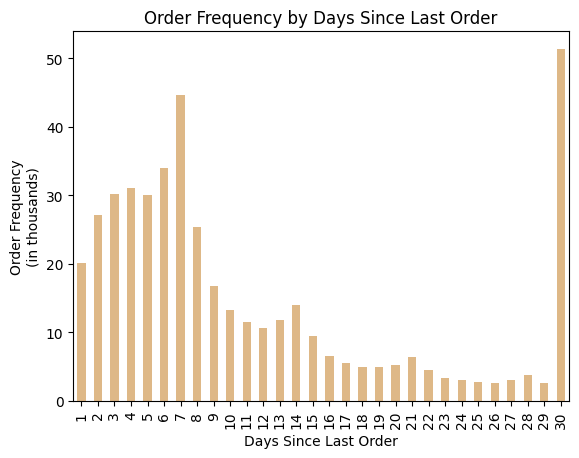

In [42]:
# Utilizo un query para quitar las ordenes con 'days_since_prior_order' es 0, por que 0 fue el valor que agregue para representar primera compra.
days_since_plot = instacart_orders.query('days_since_prior_order != 0')['days_since_prior_order'].astype(int).value_counts().sort_index()

(days_since_plot/1000).plot(kind='bar',
                     title='Order Frequency by Days Since Last Order',
                     xlabel='Days Since Last Order',
                     ylabel='Order Frequency\n(in thousands)',
                     color='burlywood'
                     )
plt.show()

Escribe aquí tus conclusiones

* Hay bastante actividad entre el día uno y el día 7, lo que me dice que usualmente la gente compra por semana y compra probablemente el mismo día.
* Hay un pico en los días 7, 14, 21 y 30. Lo que me dice que la gente suele comprar en estos lapsos de tiempo, 1, 2 3 y 4 semanas.
* La gente compra mas un mes despues, entonces hacen compras para todo el mes o por otra parte hacen compras por semana. Son los dos momentos con mas frecuencia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con estas visualizaciones y conclusiones. Siempre hay que dejar las conclusiones de las imágenes que se está mostrando
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
#Filtro primero para agarrar mis valores de 'Wednesday' y 'Saturday'
filter_wednesday = instacart_orders[instacart_orders['order_dow']=='Wednesday']
filter_saturday = instacart_orders[instacart_orders['order_dow']=='Saturday']

In [44]:
# Procedo a contar los valores de hora del dia, y le doy sort index para que me los acomode de 0-23.
plot_wednesday = filter_wednesday['order_hour_of_day'].value_counts().sort_index()
plot_saturday = filter_saturday['order_hour_of_day'].value_counts().sort_index()

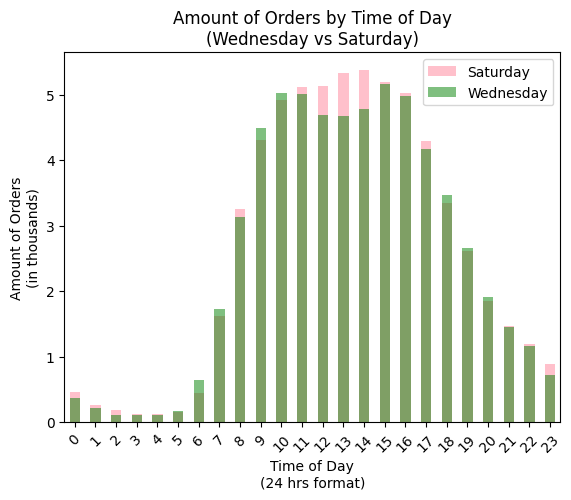

In [45]:
#Preparo mis gráficas
(plot_saturday/1000).plot(kind='bar',
                   color='pink',
                   title='Amount of Orders by Time of Day\n(Wednesday vs Saturday)'
                   )

(plot_wednesday/1000).plot(kind='bar',
                    color='green',
                    alpha = 0.5,
                    xlabel='Time of Day\n(24 hrs format)',
                    ylabel='Amount of Orders\n(in thousands)',
                    rot=45
                    )

plt.legend(['Saturday','Wednesday'])
plt.show()

Escribe aquí tus conclusiones

* Los patrones de compra son muy similares tanto en numero de ordenes como en horario. Una pequeña diferencia entre las 12:00 y 14:00 donde hay ligeramente mas movimiento los dias sabados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, esta gráfica ayuda a realizar la comparación de mejor manera debido a que esta en una sola
    
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [46]:
# Filtro por numero de orden, seguido cuento los valores individuales y le doy sort a mi index para poderlo graficar en orden.
order_number_plot = instacart_orders['order_number'].value_counts().sort_index()

order_number_plot

1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: order_number, Length: 100, dtype: int64

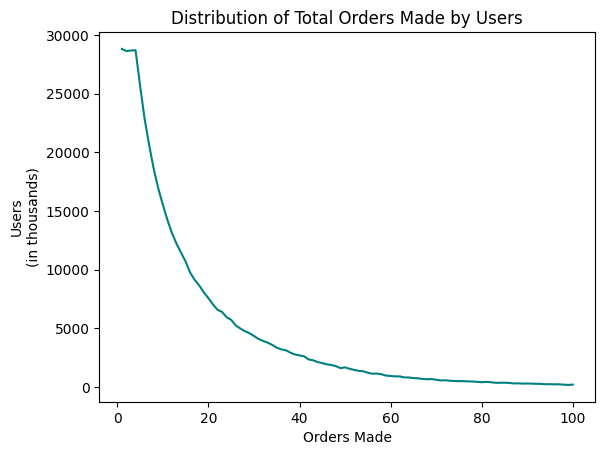

In [47]:
# Desarrollo mi gráfica
order_number_plot.plot(kind='line',
                       title='Distribution of Total Orders Made by Users',
                       xlabel='Orders Made',
                       ylabel='Users\n(in thousands)',
                       color='teal')
plt.show()

Escribe aquí tus conclusiones

* Se puede apreciar que la cantidad de usuarios que han hecho mas compras es exponencialmente inversa. La mayoría de usuario hacen de 0 a 20 compras aprox. Despues de 20 compras baja drasticamente la cantidad de usuarios. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
top_20_products.head()

,index,count
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773


In [50]:
# Filtro mis productos por id, cuento los valores de las id para definir los mas vendidos, y agarro los primeros 20 valores
top_20_products = order_products['product_id'].value_counts().head(20)
#top_20_products = order_products.groupby('product_id')['product_id'].count().sort_values(ascending=False).head(20)

# Reseteo mi indice
#top_20_products.reset_index(name='count')
top_20_products = top_20_products.reset_index(name='count')

# Uso merge en los top 20 productos con mi csv de productos para poder obtener el nombre del producto.
top_20_products_wid = pd.merge(top_20_products,products,on='product_id')

# Imprimo las columnas de product_id y product_name
top_20_products_wid[['product_id','product_name','count']]

,product_id,product_name,count
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


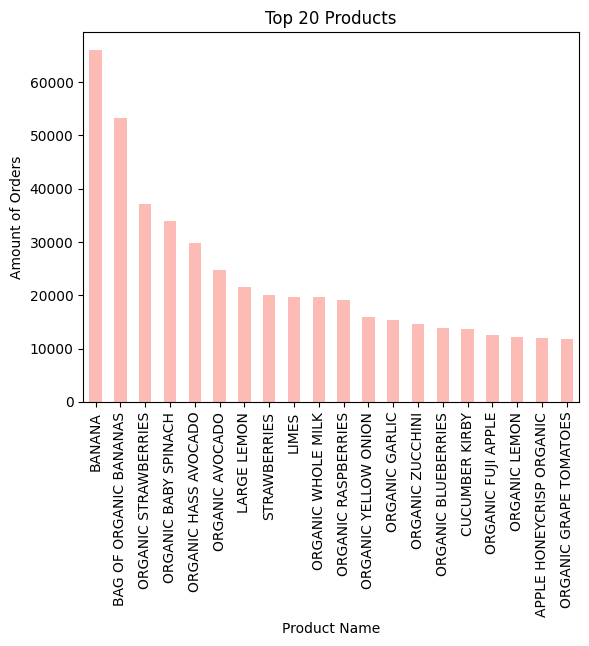

In [51]:
top_20_products_wid.plot(kind='bar',
                         y='count',
                         x='product_name',
                         color='salmon',
                         alpha=0.53,
                         legend=False,
                         title='Top 20 Products',
                         xlabel='Product Name',
                         ylabel='Amount of Orders'
                         )

plt.show()

Escribe aquí tus conclusiones

* De 20 productos, 14 tienen la palabra organic en su nombre. Lo que me indica 2 cosas, esta tienda tiene bastantes productos organicos en su catalogo y/o los productos organicos son lo mas vendido en esta tienda.
* El articulo mas vendido son las bananas.
* Podria agregar una columna para ver cual es el % total de ventas del producto sobre el departamento, o el pasillo.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No estás mostrando el conteo de los productos, deberías mostrarlo y al no aplicar un ordenamiento del resultado del conteo estás tomando cualquier producto sin tomar en cuenta cuales son los más populares. Deberías ordenar por el conteo de forma descendente y ahí tomar el head(20). También para complementar debes mostrar una gráfica de barras para su comparación
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

En este caso, una disculpa, no agregue mi gráfica de barras ni mi columna de count por que el ejercicio especifica que no busca eso, pero si tiene sentido el agregarla. Ya agregue mi grafica para ayudar con la comparacion. Y cuando uso un .value_counts() automaticamente me acomoda en modo descendente, lo cual hace inecesario que utilice un sort_values(). De igual manera, agregue la forma de hacerlo con groupby. Hay alguna ventaja en hacerlo con group by y luego agregar el sort values? O es solamente para evitar que me lo haga una Serie y mejor mantenerlo como un DF?
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Al intentar ejecutarlo en la instancia me dió error de ejecución por el nombre de la columna que se está usando, si te das cuenta la parte del `reset_index` no se está aplicando al dataframe, por eso salta el error, deberías guardar el resultado de reset_index en una variable y esa usarla para graficar. En algunas versiones es necesario especificar el sort_values para que se ordene, pero depende de la instancia donde trabajes el proyecto pero en si solo es para ordenarlo y luego poder graficarlo de manera correcta
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Ya lo guarde dentro de mi variable, creo que por error comente el que era la version mas nueva. Pero ya quedo.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, ahora si la gráfica es más fácil de usarla para la comparación!
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
# Asigno un grupo que me da cuantos productos se compraron por orden.
articles_per_order = order_products.groupby('order_id')['product_id'].count()
articles_per_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

In [53]:
# Quiero ver mi valor maximo para poder definir mis bins
articles_per_order.max()

127

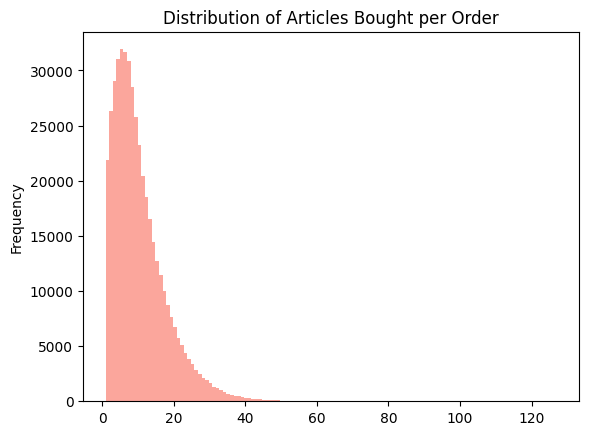

In [54]:
# Creo un histograma para ver mi distribución
articles_per_order.plot(kind='hist',
                        bins=127,
                        xlabel='Articles Bought',
                        ylabel='Frequency',
                        title='Distribution of Articles Bought per Order',
                        color='salmon',
                        alpha=0.7)

plt.show()

Escribe aquí tus conclusiones

* Por lo que veo en el gráfico, las cantidades mas compradas son 5 y 6 artículos. 
* A partir de 10 articulos empieza a decaer.
* Despues de 20 articulos ya es una caida gigantezca y se puede considerar casi nulo despues de 40 articulos. Por el lapso de tiempo que se recopilo esta informacion son 1-5 ordenes con mas de 40+ articulos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
# Hago un grupo por id de producto y sumo la columna 'reordered', el cual es 1 si se volvio a pedir o 0 si se compro por primera vez.
# sort_values para saber los mas pedidos y .head(20)
df_top20_reorder = order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False).head(20)
df_top20_reorder = df_top20_reorder.reset_index(name='reorders')
df_top20_reorder 

,product_id,reorders
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
5,47766,18743
6,27845,16251
7,47626,15044
8,27966,14748
9,16797,13945


In [56]:
# Necesito hacer un merge tomando los valores de mi nueva serie
df_top20_reorder_merge = pd.merge(df_top20_reorder, products, on='product_id')

In [57]:
# Filtro por las columnas que requiero unicamente
df_top20_reorder_merge[['product_name','product_id','reorders']]

,product_name,product_id,reorders
0,BANANA,24852,55763
1,BAG OF ORGANIC BANANAS,13176,44450
2,ORGANIC STRAWBERRIES,21137,28639
3,ORGANIC BABY SPINACH,21903,26233
4,ORGANIC HASS AVOCADO,47209,23629
5,ORGANIC AVOCADO,47766,18743
6,ORGANIC WHOLE MILK,27845,16251
7,LARGE LEMON,47626,15044
8,ORGANIC RASPBERRIES,27966,14748
9,STRAWBERRIES,16797,13945


<AxesSubplot:title={'center':'Top 20\nMost Reordered Products'}, xlabel='Product Name', ylabel='Amount of Reorders'>

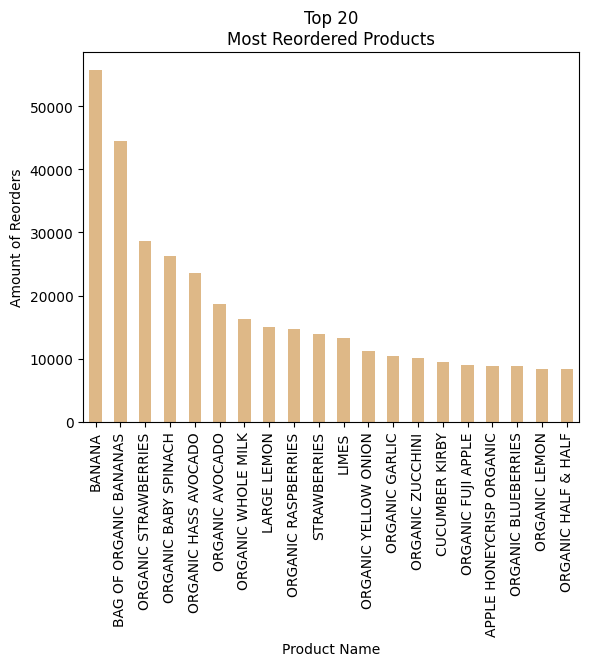

In [58]:
df_top20_reorder_merge.plot(x='product_name',
                            y='reorders',
                            title='Top 20\nMost Reordered Products',
                            kind='bar',
                            color='burlywood',
                            xlabel='Product Name',
                            ylabel='Amount of Reorders',
                            legend=False)

Escribe aquí tus conclusiones

* Hay varios compartidos con los productos mas populares, podría ser por esta razón que son populares, por ser los mas reordenados por la gente.
Banana y la bolsa de bananas son los mas reordenados y a su vez los mas populares.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, aquí aplicaste correctamente el ordenamiento. También puedes mostrar una gráfica de barras para que la comparación sea visual
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Tienes toda la razón, agregue una grafica para apoyar mis datos.
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?
Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?


In [59]:
# Filtremos para conseguir dos columnas, mi numero de repeticiones y mi total de pedidos

repeticion_df = order_products.groupby('product_id').agg(
    total_repeticiones = ('reordered','sum'),
    total_pedidos = ('reordered','count')
)
repeticion_df

,total_repeticiones,total_pedidos
product_id,,
1,158,280
2,0,11
3,31,42
4,25,49
7,1,2
...,...,...
49690,4,5
49691,31,72
49692,5,12


In [60]:
# Agrego una tercer columna -> tasa_repeticion

repeticion_df['tasa_repeticion'] = (repeticion_df['total_repeticiones'] / repeticion_df['total_pedidos'])*100
repeticion_df

,total_repeticiones,total_pedidos,tasa_repeticion
product_id,,,
1,158,280,56.428571
2,0,11,0.000000
3,31,42,73.809524
4,25,49,51.020408
7,1,2,50.000000
...,...,...,...
49690,4,5,80.000000
49691,31,72,43.055556
49692,5,12,41.666667


In [61]:
# Uso merge para poder asignarles los nombres a los IDs de producto
repeticion_df = pd.merge(repeticion_df, products, on='product_id')

In [62]:
# Uso mi sort values para tener las tasas mas altas y uso head para imprimir mis 20 valores mas altos
repeticion_df[['product_name','tasa_repeticion']].sort_values(by='tasa_repeticion',ascending=False).head(20)

# Usaria este para filtrar con ciertas condiciones ya que el de arriba me da puros de 100%
#repeticion_df.query('tasa_repeticion < 100').sort_values(by='tasa_repeticion',ascending=False).head(20)[['product_name','tasa_repeticion']]

,product_name,tasa_repeticion
13453,BONE STRENGTH TAKE CARE,100.0
19195,VANILLA SANDWICH COOKIES,100.0
6136,PALMIERS- PETITE,100.0
6144,NATURALLY SPARKLING MINERAL WATER,100.0
41319,CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...,100.0
41310,POMEGRANATEA,100.0
19258,PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS,100.0
19248,PEANUT BUTTER PIE ICE CREAM,100.0
32273,CHOCOLATE SOY MILK SINGLES,100.0
32277,MOCHA CHOCOLATE CHIP ORGANIC NON-DAIRY FROZEN...,100.0


Escribe aquí tus conclusiones

* Para mis productos menos re ordenados solo es cuestion de quitar mi ascending=False de sort_values
    * Esos productos probablemente o son de baja calidad y no se vuelven a comprar, o articulos que duran muchisimo tiempo (llantas, articulos de limpieza) o mal producto.
* Acomodando con sorting y usando ascending = False podemos ver los productos que mas se vuelven a comprar despues de su compra inicial, varios con 100%
    * Analizando los datos completos y agregando la cantidad de veces que han sido reordenados vs pedidos, podemos ver que muchos solamente tienen 1 o 15 compras. Para un dataset del tamaño que tenemos siento que esto es ruido. Por eso agregue un query que checa por tasa de reorder, igual podemos agregar esos filtros en distintos parametros y ver que mas insights podemos obtener.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?
Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

In [63]:
# Primero uso merge en mis DF's para tener user_id y reordered como columnas. Por defecto usa inner, que es lo que buscamos.
merged_products_user = pd.merge(order_products,instacart_orders,on='order_id')

#Agrupo por usuario y cuento productos pedidos por usuario y sumop productos reordenados.
merged_products_user = merged_products_user.groupby('user_id').agg(
    total_products_ordered = ('reordered','count'),
    total_products_reordered = ('reordered','sum')
)

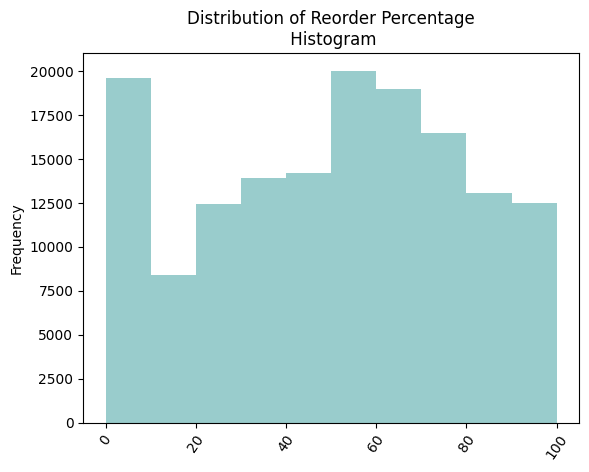

In [64]:
# Creo mi columna 'reorder_percent' y saco mi %
merged_products_user['reorder_percent'] = (merged_products_user['total_products_reordered'] / merged_products_user['total_products_ordered'])*100

#Creo un histograma con 10 percentiles para poder visualizar mejor en cuadrantes.
merged_products_user['reorder_percent'].plot(kind='hist',
                                             bins=10,
                                             color='teal',
                                             alpha=0.4,
                                             title='Distribution of Reorder Percentage\n Histogram',
                                             rot = 55,
                                             xlabel='Percentage of Reordered Products (%)',
                                             ylabel='Frequency')

plt.show()

Escribe aquí tus conclusiones

* Hay muchos usuarios (~20k) que solo el 10% de su carrito es repetido, esto podrian ser distintos factores. 
    * Les gusta probar distintas marcas.
    * No les ha agradado los productos que han comprado.
* Hay bastantes usarios que el 50% o mas de su carrito es repetido, el pico es usuarios done la mitad de su carrito se repite.
    * Pueden repetirse ciertos productos y o abarrotes.
    * Se puede aplicar ciertas estrategias de marketing al ver tendencias en estos productos.
* Podriamos aplicar igual el emparejar ciertos productos para fomentar a que la gente los siga comprando.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien calculadas las proporciones! También podrías haber usado el groupby y aplicando `mean()` sobre la columna de reordered
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?
¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

In [65]:
# Uso merge en mis DFs para traerme los nombres de los productos.
top20_add_to_cart = pd.merge(order_products,products, on='product_id')

In [66]:
# Uso un filtro para unicamente tener los articulos que fueron aregados primero
top20_add_to_cart = top20_add_to_cart.query('add_to_cart_order == 1')

In [67]:
# Uso mi group by, 2 columnas para conservar nombre y ID, cuento la cantidad de veces que se agregaron primero al carrito
# Uso sort con ascending False para tener primero los que mas se agregaron primero y finalmente uso head(20) para solo tener 20 valores.
#top20_add_to_cart.groupby(['product_id','product_name'])['add_to_cart_order'].count().sort_values(ascending=False).head(20)

top20_count = top20_add_to_cart.groupby(['product_id','product_name'])['add_to_cart_order'].count().reset_index(name='count')
top20_count = top20_count.sort_values(by='count',ascending=False).head(20)
top20_count

,product_id,product_name,count
13414,24852,BANANA,15562
7127,13176,BAG OF ORGANIC BANANAS,11026
15028,27845,ORGANIC WHOLE MILK,4363
11384,21137,ORGANIC STRAWBERRIES,3946
25439,47209,ORGANIC HASS AVOCADO,3390
11786,21903,ORGANIC BABY SPINACH,3336
25732,47766,ORGANIC AVOCADO,3044
10622,19660,SPRING WATER,2336
9050,16797,STRAWBERRIES,2308
15102,27966,ORGANIC RASPBERRIES,2024


<AxesSubplot:title={'center':'Top 20 Articles\n(Added First to Cart)'}, xlabel='Product Name', ylabel='Number of Times Added First to Cart'>

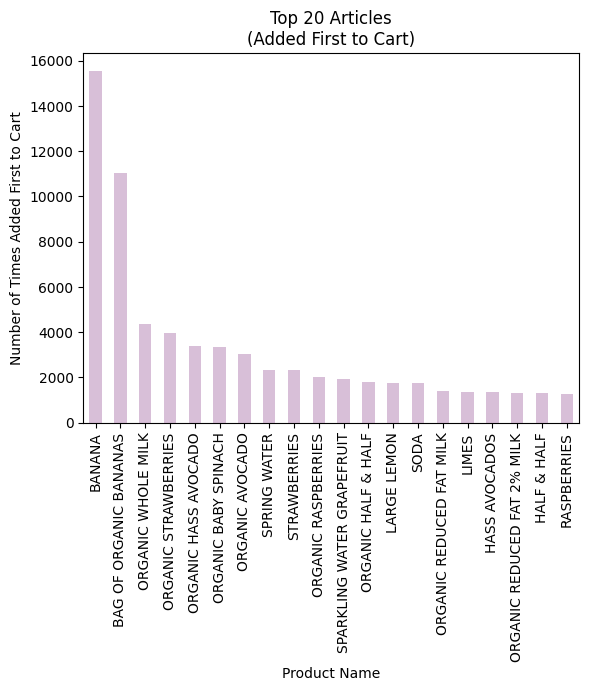

In [68]:
top20_count.plot(x='product_name',
                 y='count',
                 title='Top 20 Articles\n(Added First to Cart)',
                 kind='bar',
                 color='thistle',
                 ylabel='Number of Times Added First to Cart',
                 xlabel='Product Name',
                 legend=False
                 )

Escribe aquí tus conclusiones

* Mas de la mitad de los productos son frutas / verduras. Los otros productos son bebidas.
* La mayoria de la gente empieza a hacer su mandado por las frutas y verduras.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Aquí también deberías mostrar una gráfica de barras para poder realizar la comparación del conteo de manera visual
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Tienes toda la razón, agregue mi gráfica.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, ahora es mucho más fácil poder comparar los datos de cada producto
</div>

### Conclusion general del proyecto:

Muy buen proyecto, conseguimos varios insights y me gustaria ir viendo como poder procesarlos para compartirlos con distintos departamentos para poder incrementar ventas o hacer campañas de productos mas exitosas. Hay muchas cosas que se pueden hacer. Desde optimizar y/ acomodar productos como ver estrategias de marketing de que juntar con que. Juntar un producti top seller con uno de bajo movimiento pero que esten relacionados para subir la cantidadd e veces que clientes re-ordenan. Ver que dias de la semana la gente compra mas reordenes y que dias compran menos reordenes y ajustar marketing acorde a eso.

Personalmente este proyecto me ha gustado muchisimo, siento que ya empieza a ser manejo de datos con un enfoque mas aplicado y no puedo esperar a ver que mas se viene.

Lamentablemente habia llegado al punto B con mi proyecto y me di cuenta que lo estaba haciendo en un Notebook vacio que empece de cero. Me gusto saber que llegue tan lejos con resultados demasiado similares. Practicamente identicos. Me hubiera gustado acabar antes pero me retrase bastante por ese error.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo Carlos! Tu proyecto ahora es mucho más completo y claro, recuerda siempre que para exponer de manera sencilla tus hallazgos en el análisis lo mejor es utilizar gráficas y para esto hay que usar las correctas para cada caso.
    
Saludos!
</div>